In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix as cm
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
%matplotlib inline

# Word2Vec

In [11]:
# Load Word embeddings
_dir = "C:/Users/talha/Documents/dl/"
word_vec_file = _dir + "vectors.txt"
with open(word_vec_file, encoding='latin1') as f:
    word_vec = np.loadtxt(f,dtype=str,delimiter=' ')

In [12]:
num_word_vec_encodings = word_vec.shape[0]
word_vec_dim = word_vec.shape[1] - 1

In [13]:
# Get word vectors
word_vectors = word_vec.reshape(word_vec.shape[0], word_vec_dim + 1)
word_vec_df = pd.DataFrame(index=word_vec[:, 0], data=list(word_vec[:,np.arange(1,word_vec_dim+1)]))

assert word_vec_df.shape == (num_word_vec_encodings, word_vec_dim)

In [14]:
word_indices_list = list(word_vec[:,0])
# word_vectors: Contains vector representations of the words
word_vectors = word_vec[:,1:51]
# print(word_vectors.shape)
word_vectors = word_vectors.astype(dtype=np.float32)

In [99]:
def get_top_similar_words(input_word, word_vectors, n=20):
    n+=1
    input_word_vec = word_vectors[word_indices_list.index(input_word)]
    dot_prod = np.dot(input_word_vec.T, word_vectors.T)
    word_norm = np.linalg.norm(input_word_vec)
    word_vec_norm = np.linalg.norm(word_vectors.T, axis=0)
    norm = word_norm * word_vec_norm
    similarity = dot_prod / norm
    topN_similar_indices = similarity.argsort()[-n:][::-1]
    word_indices_np = np.array(word_indices_list)
    topN_similar_words = word_indices_np[topN_similar_indices]
    return topN_similar_words[1:]

In [100]:
words = ['life', 'market', 'stanford', 'trump', 'public']
for word in words:
    print ("Word = " + word)
    print ("Similar words: ")
    similar_words = get_top_similar_words(word, word_vectors, 20)
    print(", ".join(similar_words))
    print ()

Word = life
Similar words: 
mind, love, lives, own, kind, experience, child, perhaps, she, whose, indeed, her, same, work, true, way, once, fact, this, much

Word = market
Similar words: 
markets, prices, stock, buying, consumer, retail, stocks, price, sales, business, trend, rise, industry, sector, investors, trading, demand, economy, higher, analysts

Word = stanford
Similar words: 
ucla, harvard, yale, princeton, rutgers, university, baylor, graduate, georgetown, cornell, usc, uc, hopkins, professor, berkeley, college, vanderbilt, ph.d., purdue, penn

Word = trump
Similar words: 
casino, casinos, hilton, mogul, vegas, murdoch, taj, mgm, gambling, hollywood, rockefeller, hotel, disney, luxury, condominium, owns, viacom, worldcom, carlton, tycoon

Word = public
Similar words: 
private, office, attention, local, for, media, new, address, own, concerned, health, business, focused, services, administration, lack, critical, calls, giving, social



In [101]:
some_other_words = ['spain', 'football', 'enjoy', 'hurricane', 'happy', 'arsenal']
for word in some_other_words:
    print ("Word = " + word)
    print ("Similar words: ")
    similar_words = get_top_similar_words(word, word_vectors, 20)
    print(", ".join(similar_words))
    print ()

Word = spain
Similar words: 
portugal, italy, argentina, brazil, spanish, costa, france, rica, republic, ecuador, paraguay, chile, mexico, colombia, uruguay, switzerland, madrid, peru, belgium, monaco

Word = football
Similar words: 
soccer, league, basketball, club, hockey, rugby, team, baseball, coaching, player, teams, coached, played, coach, athletic, nfl, leagues, players, championship, season

Word = enjoy
Similar words: 
enjoying, good, enjoyed, opportunity, always, appreciate, prefer, our, happy, want, everyone, bring, enjoys, plenty, feel, make, opportunities, lot, come, welcome

Word = hurricane
Similar words: 
storm, katrina, storms, landfall, typhoon, tropical, ike, cyclone, hurricanes, winds, forecasters, flooding, flood, charley, rita, rains, floods, devastation, gale, rain

Word = happy
Similar words: 
'm, everyone, everybody, really, me, definitely, maybe, 'd, feel, i, always, glad, something, good, 're, imagine, thing, 'll, think, myself

Word = arsenal
Similar words: 

## T-SNE Visualization of word vectors

In [18]:
from sklearn.manifold import TSNE

In [103]:
def create_tsne_plot(words, figsize=(10,10)):
    wv = []
    
    # Get word vectors for input words
    for word in words:
        wv.append(word_vectors[word_indices_list.index(word)])
    
    # Create TSNE model with given words
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_projection = tsne_model.fit_transform(wv)

    # Plot the TSNE projection
    plt.figure(figsize=figsize)
    for ind, pt in enumerate(tsne_projection):
        plt.scatter(pt[0],pt[1])
        plt.annotate(words[ind],
                     xy=(pt[0], pt[1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='left',
                     va='top')
        
    plt.show()

#### T-SNE visualization for 20 most similar words

Visualization for words similar to: life


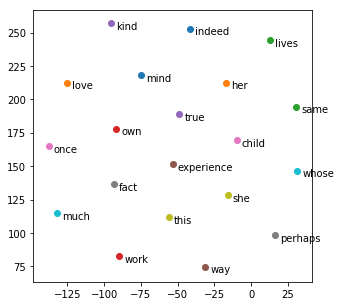


Visualization for words similar to: market


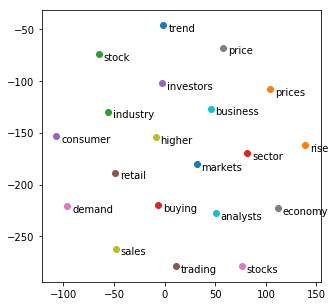


Visualization for words similar to: stanford


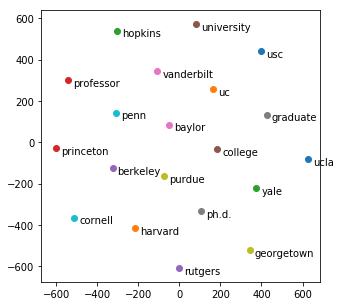


Visualization for words similar to: trump


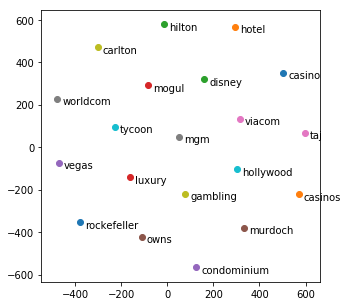


Visualization for words similar to: public


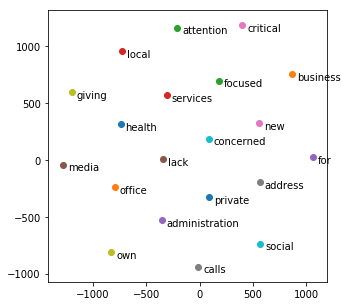

In [107]:
for word in words:
    print ("Visualization for words similar to: " + word)
    create_tsne_plot(get_top_similar_words(word, word_vectors, 20), (5,5))
    print()

#### T-SNE visualization for the 5 words (life, market, stanford, trump, public)

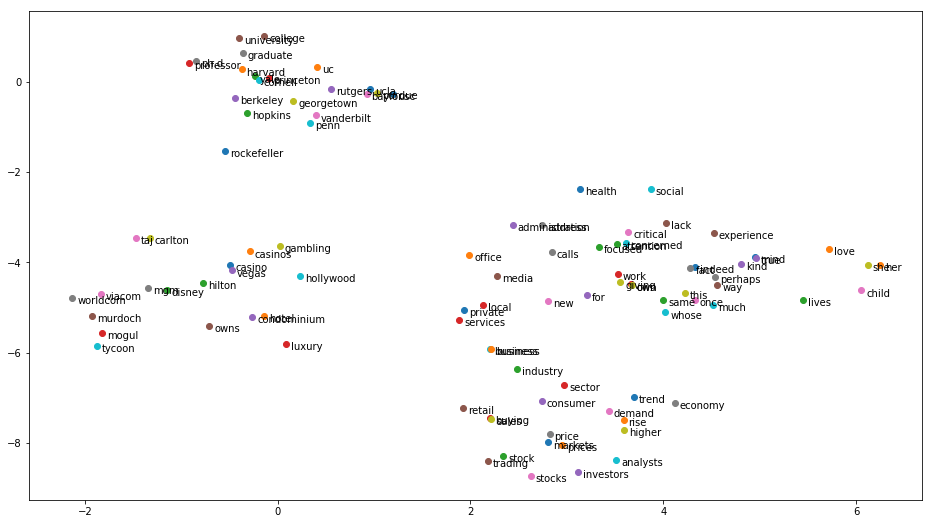

In [117]:
similar_words=[]
for word in words:
    similar_words.extend(get_top_similar_words(word, word_vectors))
create_tsne_plot(similar_words, (16,9))

#### T-SNE visualization for words (spain, football, enjoy, hurricane, happy, arsenal)

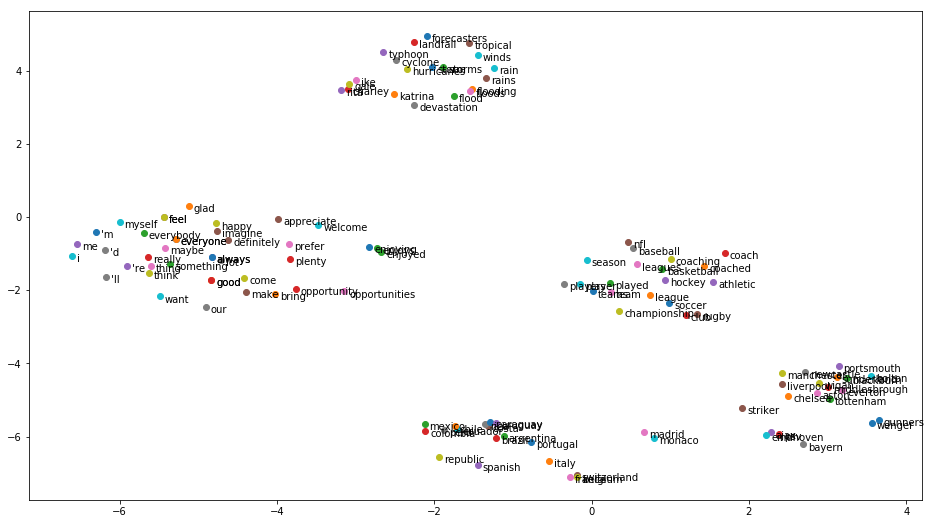

In [119]:
similar_words=[]
for word in some_other_words:
    similar_words.extend(get_top_similar_words(word, word_vectors))
create_tsne_plot(similar_words, (16,9))

#### T-SNE Visualization for all words

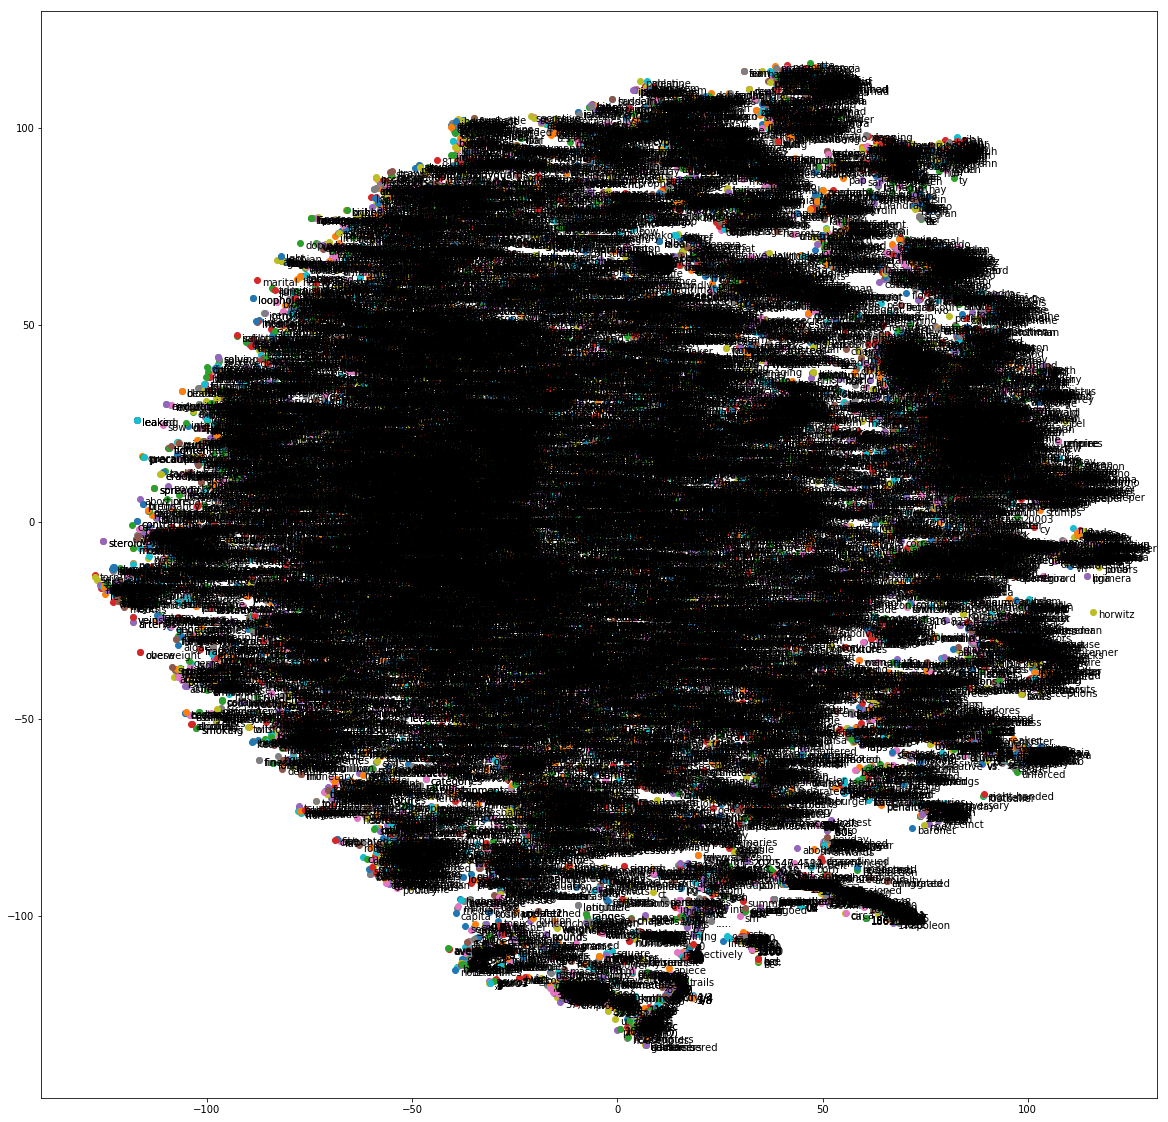

In [109]:
create_tsne_plot(word_indices_list, (20,20))